# Human Activity Recognition

- Originally completed for a graded assignment in September 2022
- Modified to remove assignment specific details

## Load raw data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tsfresh
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
# Load raw data for walking
walking = pd.read_csv("walking.csv", index_col=0, parse_dates=True)
walking

,ax,ay,az,atotal
time,,,,
2022-08-11 17:49:32.719,0.17,-0.42,-0.12,0.46
2022-08-11 17:49:32.720,0.15,-0.33,-0.28,0.45
2022-08-11 17:49:32.726,0.09,-0.02,-0.17,0.19
2022-08-11 17:49:32.747,-0.04,0.18,0.14,0.23
2022-08-11 17:49:32.748,-0.17,0.21,0.41,0.49
...,...,...,...,...
2022-08-11 17:52:16.578,-0.10,0.42,0.14,0.45
2022-08-11 17:52:16.587,0.04,0.20,0.72,0.74
2022-08-11 17:52:16.601,0.18,-0.04,1.22,1.23


In [3]:
# Load raw data for running
running = pd.read_csv("running.csv", index_col=0, parse_dates=True)
running

,ax,ay,az,atotal
time,,,,
2022-08-11 17:53:54.282,0.16,0.21,-0.34,0.43
2022-08-11 17:53:54.292,0.26,0.27,-0.35,0.51
2022-08-11 17:53:54.303,0.48,0.10,-0.18,0.52
2022-08-11 17:53:54.317,0.60,0.06,-0.19,0.63
2022-08-11 17:53:54.322,0.56,0.06,-0.16,0.58
...,...,...,...,...
2022-08-11 17:56:29.421,-0.25,0.58,-0.27,0.68
2022-08-11 17:56:29.432,-0.01,0.60,-0.97,1.14
2022-08-11 17:56:29.441,0.26,0.52,-1.61,1.71


## Visualise raw data

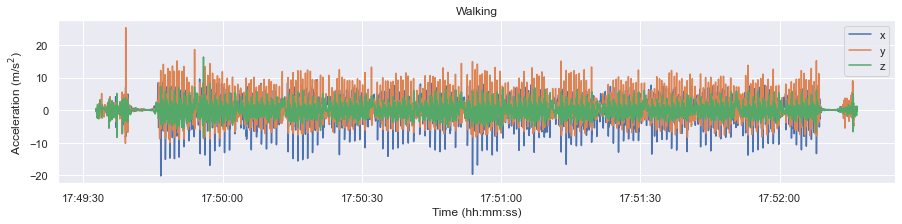

In [4]:
def plot_raw_data(df, title):
    plt.rcParams['figure.figsize'] = [15, 3]
    plt.plot(df["ax"], label="x")
    plt.plot(df["ay"], label="y")
    plt.plot(df["az"], label="z")

    plt.title(title)
    plt.xlabel("Time (hh:mm:ss)")
    plt.ylabel("Acceleration (m/s$^2$)")
    plt.legend()

plot_raw_data(walking, "Walking")

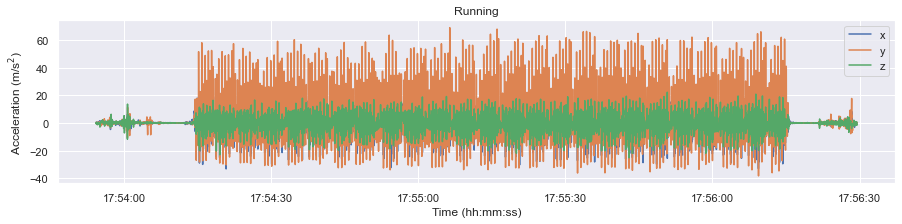

In [5]:
plot_raw_data(running, "Running")

## Pre-process raw data

In [6]:
# Add second timeline delta_t to walking raw data
def add_delta_t(df):
    df["delta_t"] = [df.index[x]-df.index[0] for x in range(len(df.index))]

add_delta_t(walking)
walking

,ax,ay,az,atotal,delta_t
time,,,,,
2022-08-11 17:49:32.719,0.17,-0.42,-0.12,0.46,0 days 00:00:00
2022-08-11 17:49:32.720,0.15,-0.33,-0.28,0.45,0 days 00:00:00.001000
2022-08-11 17:49:32.726,0.09,-0.02,-0.17,0.19,0 days 00:00:00.007000
2022-08-11 17:49:32.747,-0.04,0.18,0.14,0.23,0 days 00:00:00.028000
2022-08-11 17:49:32.748,-0.17,0.21,0.41,0.49,0 days 00:00:00.029000
...,...,...,...,...,...
2022-08-11 17:52:16.578,-0.10,0.42,0.14,0.45,0 days 00:02:43.859000
2022-08-11 17:52:16.587,0.04,0.20,0.72,0.74,0 days 00:02:43.868000
2022-08-11 17:52:16.601,0.18,-0.04,1.22,1.23,0 days 00:02:43.882000


In [7]:
# Add second timeline delta_t to running raw data
add_delta_t(running)
running

,ax,ay,az,atotal,delta_t
time,,,,,
2022-08-11 17:53:54.282,0.16,0.21,-0.34,0.43,0 days 00:00:00
2022-08-11 17:53:54.292,0.26,0.27,-0.35,0.51,0 days 00:00:00.010000
2022-08-11 17:53:54.303,0.48,0.10,-0.18,0.52,0 days 00:00:00.021000
2022-08-11 17:53:54.317,0.60,0.06,-0.19,0.63,0 days 00:00:00.035000
2022-08-11 17:53:54.322,0.56,0.06,-0.16,0.58,0 days 00:00:00.040000
...,...,...,...,...,...
2022-08-11 17:56:29.421,-0.25,0.58,-0.27,0.68,0 days 00:02:35.139000
2022-08-11 17:56:29.432,-0.01,0.60,-0.97,1.14,0 days 00:02:35.150000
2022-08-11 17:56:29.441,0.26,0.52,-1.61,1.71,0 days 00:02:35.159000


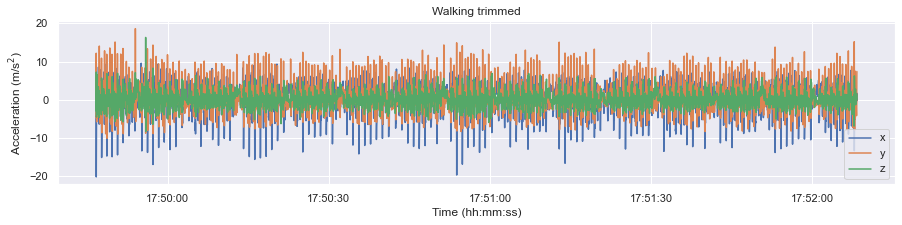

In [8]:
# Remove transition periods of walking raw data
walking_trimmed = walking[1401:15681] # Determined from visual inspection of plot raw data row index in Excel
plot_raw_data(walking_trimmed, "Walking trimmed")

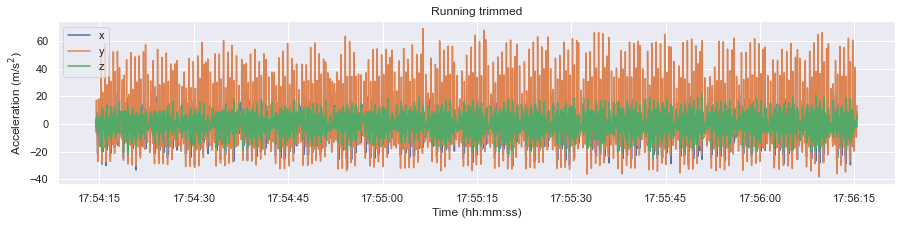

In [9]:
# Remove transition periods of running raw data
running_trimmed = running[2031:14211] # Determined from visual inspection of raw data against row index in Excel
plot_raw_data(running_trimmed, "Running trimmed")

## Extract features

In [10]:
# Create windows for walking data
pd.options.mode.chained_assignment = None
walking_trimmed["window_idx"] = ["w"+str(int(x/100)).rjust(3, "0") for x in range(len(walking_trimmed))]
walking_trimmed

,ax,ay,az,atotal,delta_t,window_idx
time,,,,,,
2022-08-11 17:49:46.618,3.04,-1.54,-2.00,3.95,0 days 00:00:13.899000,w000
2022-08-11 17:49:46.622,2.85,0.88,-2.95,4.19,0 days 00:00:13.903000,w000
2022-08-11 17:49:46.633,3.01,4.45,-0.68,5.41,0 days 00:00:13.914000,w000
2022-08-11 17:49:46.644,0.65,6.11,1.90,6.43,0 days 00:00:13.925000,w000
2022-08-11 17:49:46.652,-5.72,9.32,3.58,11.50,0 days 00:00:13.933000,w000
...,...,...,...,...,...,...
2022-08-11 17:52:08.360,1.61,-1.58,0.79,2.39,0 days 00:02:35.641000,w142
2022-08-11 17:52:08.362,1.71,1.36,0.23,2.19,0 days 00:02:35.643000,w142
2022-08-11 17:52:08.365,0.31,3.51,0.50,3.55,0 days 00:02:35.646000,w142


In [11]:
# Create windows for running data
running_trimmed["window_idx"] = ["r"+str(int(x/100)).rjust(3, "0") for x in range(len(running_trimmed))]
running_trimmed

,ax,ay,az,atotal,delta_t,window_idx
time,,,,,,
2022-08-11 17:54:14.450,4.18,-2.18,2.51,5.34,0 days 00:00:20.168000,r000
2022-08-11 17:54:14.460,3.08,-1.28,1.04,3.49,0 days 00:00:20.178000,r000
2022-08-11 17:54:14.469,1.87,1.02,-1.04,2.37,0 days 00:00:20.187000,r000
2022-08-11 17:54:14.479,1.05,5.79,-2.02,6.22,0 days 00:00:20.197000,r000
2022-08-11 17:54:14.488,-0.77,8.76,-1.33,8.89,0 days 00:00:20.206000,r000
...,...,...,...,...,...,...
2022-08-11 17:56:15.342,5.76,0.88,-1.89,6.12,0 days 00:02:21.060000,r121
2022-08-11 17:56:15.350,3.54,4.57,4.48,7.31,0 days 00:02:21.068000,r121
2022-08-11 17:56:15.374,4.80,5.86,6.12,9.73,0 days 00:02:21.092000,r121


In [12]:
all = pd.concat([walking_trimmed, running_trimmed])

In [13]:
from tsfresh.feature_extraction import extract_features

X = extract_features(all, column_id="window_idx", column_sort="delta_t")

Feature Extraction: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


In [14]:
X.shape

(265, 3176)

3176 features extracted.

## Activity Recognition Model

In [15]:
# Remove NaN, inf, and -inf from feature matrix
X.replace([np.inf, -np.inf], np.nan)
X_real = X.dropna(axis=1)
X_real.shape

(265, 2222)

In [16]:
# Create labels
y = pd.Series(data=["r" in x for x in X_real.index], index=X_real.index)
y

r000     True
r001     True
r002     True
r003     True
r004     True
        ...  
w138    False
w139    False
w140    False
w141    False
w142    False
Length: 265, dtype: bool

In [17]:
from tsfresh.transformers import FeatureSelector 

select = FeatureSelector()
select.fit(X_real,y)
X_sig = select.transform(X_real) # Get statistically significant features
X_sig.shape

(265, 975)

In [18]:
p_values = pd.Series(select.p_values, index=select.features)
p_values[:5]

atotal__median             1.075187e-44
ay__minimum                1.075666e-44
ay__maximum                1.075735e-44
ay__absolute_maximum       1.075769e-44
atotal__quantile__q_0.3    1.075804e-44
dtype: float64

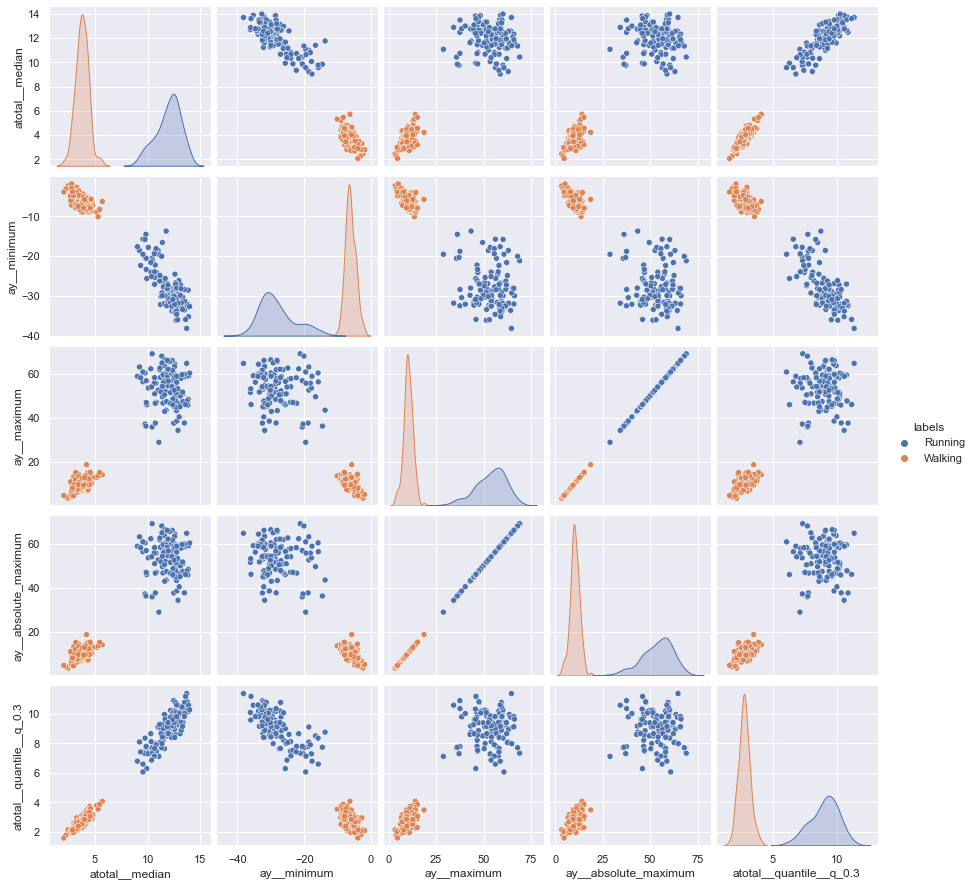

In [19]:
X_5 = X.loc[:, select.features[:5]] # Get five most statistically significant features
X_5["labels"] = ["Running" if x else "Walking" for x in y]
sns.pairplot(X_5, hue="labels")

In [20]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)

In [21]:
# Cross-validation
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=0) # 10-times repeated 10-fold
cross_val_score(clf, X_sig, y, cv=rkf, scoring="roc_auc") # ROC AUC scoring method

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

The models were able to make correct out-of-sample predictions and correctly classify walking and running every time.